In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


In [11]:
df=pd.read_csv('Mall_Customers.csv')
df.dtypes
df.head()
df.shape

(200, 5)

In [12]:
df=df.rename(columns={'Annual Income (k$)': 'Income','Spending Score (1-100)':'score'})
df= df.drop(columns=['CustomerID'])
numerics_cols = df.select_dtypes(include=np.number).columns.tolist()

<AxesSubplot:>

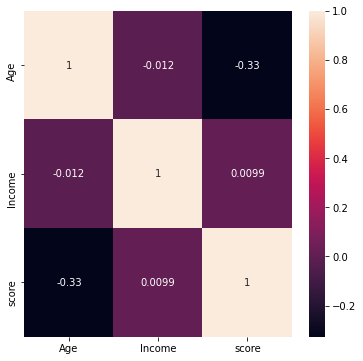

In [13]:
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.heatmap(df.drop(columns='Gender').corr(),annot=True)

/home/eman/.conda/envs/nano/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eman/.conda/envs/nano/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eman/.conda/envs/nano/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

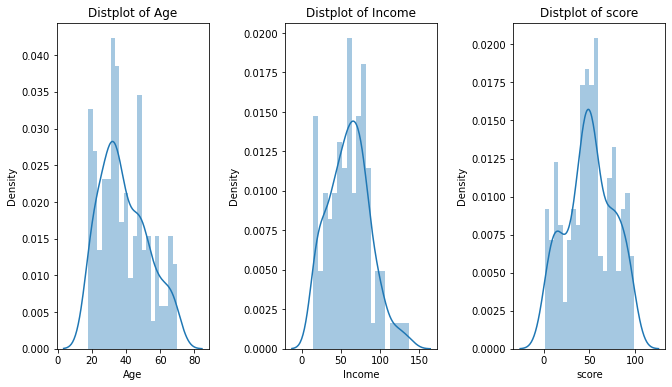

In [14]:
plt.figure(1,figsize=(15,6))
n=0
for x in numerics_cols:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
skewed_cols = df.skew().sort_values()
skewed_cols

score    -0.047220
Income    0.321843
Age       0.485569
dtype: float64

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
df['Gender'] = label_binarizer.fit_transform(df['Gender'])
label_binarizer.classes_

array(['Female', 'Male'], dtype='<U6')

In [17]:
data =df.copy()
from sklearn.preprocessing import MinMaxScaler
minMax_Scaler = MinMaxScaler()
cols_list = list(data.columns)
for column in [cols_list]:
    data[column] = minMax_Scaler.fit_transform(data[column])

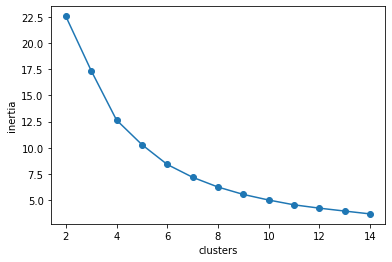

In [18]:
inertia =[]
n_clusters = list(range(2,15))
for k in n_clusters :
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data[['Income','Age','score']])
    inertia.append(kmeans_model.inertia_)

plt.plot(n_clusters,inertia)
plt.scatter(n_clusters,inertia)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

<AxesSubplot:xlabel='score', ylabel='Income'>

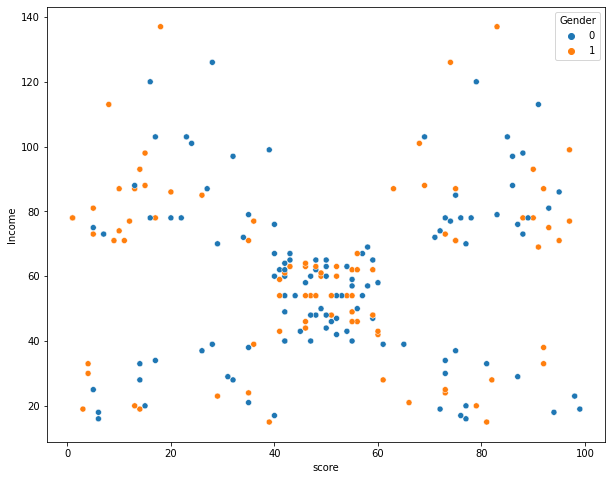

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="score", y="Income", hue="Gender")

In [20]:
color = 'rgbmcyk'


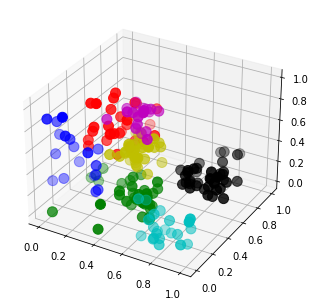

In [21]:
k_model = KMeans(n_clusters=7, init='k-means++')
d4= data.drop(columns=['Gender'])
k_model.fit(d4)
fig = plt.figure()
ax2 = Axes3D(fig)
#ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

for i in range (0,7):
    ax2.scatter(d4[k_model.labels_ == i]['score'], d4[k_model.labels_ == i]['Income'] ,d4[k_model.labels_ == i]['Age'],s= 100, c =color[i])
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=7, linkage='ward')
agg_model.fit(d4)

AgglomerativeClustering(n_clusters=7)

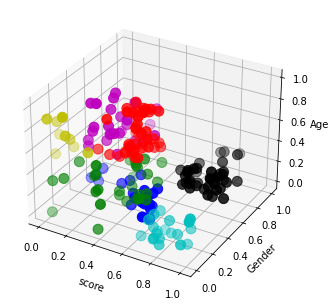

In [23]:
fig = plt.figure()
ax2 = Axes3D(fig)
ax2.set_xlabel('score')
ax2.set_ylabel('Gender')
ax2.set_zlabel('Age')
#ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

for i in range (0,7):
    ax2.scatter(d4[agg_model.labels_ == i]['score'], d4[agg_model.labels_ == i]['Income'] ,d4[agg_model.labels_ == i]['Age'],s= 100, c =color[i])
plt.show()

In [24]:
#kmeans statistics:
for i in range(0,7):
    dfr= d4[k_model.labels_ == i].describe()
    print (dfr)

             Age     Income      score
count  28.000000  28.000000  28.000000
mean    0.497940   0.625293   0.159985
std     0.160328   0.138652   0.091566
min     0.269231   0.459016   0.000000
25%     0.360577   0.516393   0.099490
50%     0.490385   0.590164   0.153061
75%     0.572115   0.692623   0.216837
max     0.788462   1.000000   0.387755
             Age     Income      score
count  38.000000  38.000000  38.000000
mean    0.116397   0.329810   0.430183
std     0.096096   0.130918   0.161820
min     0.000000   0.000000   0.040816
25%     0.019231   0.258197   0.400510
50%     0.096154   0.364754   0.474490
75%     0.173077   0.407787   0.540816
max     0.307692   0.540984   0.602041
             Age     Income      score
count  18.000000  18.000000  18.000000
mean    0.569444   0.095628   0.174036
std     0.199104   0.054444   0.117156
min     0.326923   0.024590   0.020408
25%     0.379808   0.043033   0.068878
50%     0.567308   0.094262   0.137755
75%     0.687500   0.1413

In [25]:
#agg_model statistics:
for i in range(0,7):
    dfr= d4[agg_model.labels_ == i].describe()
    print (dfr)

             Age     Income      score
count  47.000000  47.000000  47.000000
mean    0.731997   0.324555   0.476118
std     0.160516   0.083410   0.077018
min     0.480769   0.188525   0.275510
25%     0.596154   0.258197   0.428571
50%     0.692308   0.319672   0.479592
75%     0.903846   0.389344   0.535714
max     1.000000   0.524590   0.602041
             Age     Income      score
count  30.000000  30.000000  30.000000
mean    0.319872   0.208470   0.409184
std     0.122304   0.133696   0.157634
min     0.019231   0.000000   0.051020
25%     0.250000   0.106557   0.346939
50%     0.326923   0.204918   0.418367
75%     0.413462   0.319672   0.525510
max     0.519231   0.442623   0.612245
             Age     Income      score
count  26.000000  26.000000  26.000000
mean    0.073964   0.392182   0.425432
std     0.062420   0.075541   0.172102
min     0.000000   0.254098   0.040816
25%     0.019231   0.348361   0.400510
50%     0.057692   0.385246   0.494898
75%     0.129808   0.4446

In [26]:
from sklearn.cluster import DBSCAN
clusters =[]
models =[]
noise = []
for eps in [0.05, 0.06,0.08, 0.1 ,0.2 , 0.3]:
    dbscan = DBSCAN(eps= eps,min_samples=5)
    dbscan.fit(d4)
    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    n_noise_ = list(dbscan.labels_).count(-1)
    clusters.append(n_clusters_)
    noise.append(n_noise_)
    models.append(dbscan)

In [27]:
clusters,noise

([2, 4, 8, 7, 1, 1], [190, 173, 122, 98, 6, 0])

In [28]:
dbscan = DBSCAN(eps= .1,min_samples=5)
dbscan.fit(d4)
clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
clusters

7

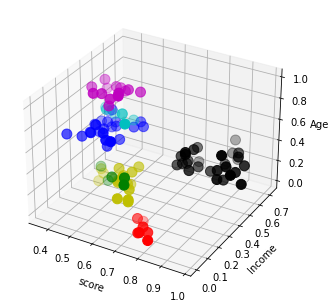

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('score')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
#ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

for i in range (0,7):
    ax.scatter(d4[dbscan.labels_ == i]['score'], d4[dbscan.labels_ == i]['Income'] ,d4[dbscan.labels_ == i]['Age'],s= 100, c =color[i])
plt.show()

In [31]:
for i in range(0,7):
    dfr= d4[dbscan.labels_ == i].describe()
    print (dfr)

            Age    Income     score
count  7.000000  7.000000  7.000000
mean   0.087912  0.043326  0.771137
std    0.029074  0.043040  0.029957
min    0.057692  0.000000  0.734694
25%    0.067308  0.012295  0.750000
50%    0.076923  0.040984  0.775510
75%    0.105769  0.057377  0.785714
max    0.134615  0.122951  0.816327
            Age    Income     score
count  5.000000  5.000000  5.000000
mean   0.246154  0.234426  0.546939
std    0.043853  0.028747  0.060626
min    0.173077  0.196721  0.469388
25%    0.250000  0.221311  0.510204
50%    0.250000  0.229508  0.540816
75%    0.269231  0.254098  0.602041
max    0.288462  0.270492  0.612245
             Age     Income      score
count  23.000000  23.000000  23.000000
mean    0.591137   0.317177   0.475599
std     0.046465   0.074857   0.058758
min     0.480769   0.196721   0.357143
25%     0.567308   0.245902   0.433673
50%     0.596154   0.319672   0.459184
75%     0.615385   0.381148   0.510204
max     0.692308   0.426230   0.591837
 

In [32]:
for i in range(0,7):
    dfr= d4[dbscan.labels_ == i].describe()
    print (dfr)

            Age    Income     score
count  7.000000  7.000000  7.000000
mean   0.087912  0.043326  0.771137
std    0.029074  0.043040  0.029957
min    0.057692  0.000000  0.734694
25%    0.067308  0.012295  0.750000
50%    0.076923  0.040984  0.775510
75%    0.105769  0.057377  0.785714
max    0.134615  0.122951  0.816327
            Age    Income     score
count  5.000000  5.000000  5.000000
mean   0.246154  0.234426  0.546939
std    0.043853  0.028747  0.060626
min    0.173077  0.196721  0.469388
25%    0.250000  0.221311  0.510204
50%    0.250000  0.229508  0.540816
75%    0.269231  0.254098  0.602041
max    0.288462  0.270492  0.612245
             Age     Income      score
count  23.000000  23.000000  23.000000
mean    0.591137   0.317177   0.475599
std     0.046465   0.074857   0.058758
min     0.480769   0.196721   0.357143
25%     0.567308   0.245902   0.433673
50%     0.596154   0.319672   0.459184
75%     0.615385   0.381148   0.510204
max     0.692308   0.426230   0.591837
 

In [39]:
def draw_model (model,clusters_n):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel('score')
    ax.set_ylabel('Income')
    ax.set_zlabel('Age')
    #ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

    for i in range (0,clusters_n):
        ax.scatter(d4[model.labels_ == i]['score'], d4[model.labels_ == i]['Income'] ,d4[model.labels_ == i]['Age'],s= 100, c =color[i])
    plt.show()

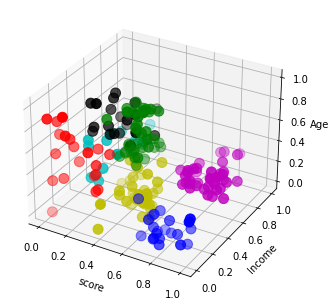

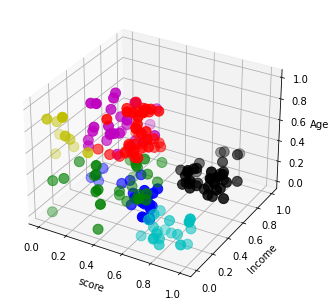

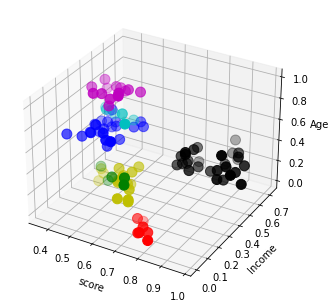

In [42]:

draw_model(k_model,7)
draw_model(agg_model,7)
draw_model(dbscan,7)

In [75]:
def display_data (model, clusters_n):
    for i in range(0,clusters_n):
        dfr= d4[model.labels_ == i].describe()[0:2]
        
        print (dfr)

In [49]:
data


,Gender,Age,Income,score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [ ]:
minMax_Scaler.inverse_transform()

In [76]:
print('Kmeans model')
display_data(k_model,7)
print()
print(' agg model')
display_data(agg_model,7)
print()

print('DBSCAN')
display_data(dbscan,7)

Kmeans model
             Age     Income      score
count  20.000000  20.000000  20.000000
mean    0.543269   0.096311   0.177041


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

for Kmeans Model:

             Age     Income      score
count  22.00000  22.000000  22.000000
mean    0.13986   0.087928   0.799629

             Age     Income      score
count  39.000000  39.000000  39.000000
mean    0.282544   0.586381   0.827839




Agglomerative Clustering Model

             Age     Income      score
count  21.000000  21.000000  21.000000
mean    0.130952   0.087041   0.808552

             Age     Income      score
count  39.000000  39.000000  39.000000
mean    0.282544   0.586381   0.827839



for DBSCAN Model:

            Age    Income     score
count  7.000000  7.000000  7.000000
mean   0.087912  0.043326  0.771137

            Age     Income      score
count  28.00000  28.000000  28.000000
mean    0.28022   0.538934   0.836735



In [65]:
print(minMax_Scaler.inverse_transform([[0,0.0 ,  0.0 ,  0.799629]]))
0.000000
Income    0.000000
score     0.107185
minMax_Scaler.inverse_transform([[0,0.282544,   0.586381  , 0.827839]])

[[ 0.       25.27272  25.727216 79.363642]]


array([[ 0.      , 32.692288, 86.538482, 82.128222]])

In [66]:
print(minMax_Scaler.inverse_transform([[0,0.130952  , 0.087041 ,  0.808552]]))
minMax_Scaler.inverse_transform([[0,0.282544 ,  0.586381  , 0.827839]])

[[ 0.       24.809504 25.619002 80.238096]]


array([[ 0.      , 32.692288, 86.538482, 82.128222]])

In [ ]:
print(minMax_Scaler.inverse_transform([[0,0.130952  , 0.087041 ,  0.808552]]))
minMax_Scaler.inverse_transform([[0,0.282544 ,  0.586381  , 0.827839]])